<a href="https://colab.research.google.com/github/rhqtmfajfl/python-study/blob/master/cv_lecture/06_Haar_Cascade_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haar-Cascade Detection
* 딥러닝 방식은 아니다!
* 딥러닝 기반 Object Detection이 많이 유행하곤 있지만 딥러닝 보다 훨씬 가볍기 때문에 가볍게 인식하기위한 어플리케이션 개발에 이용될 수 있다.

* 퍼포먼스가 많이 좋진 않다.
  * 얼굴 인식을 잘 하다가, 약간 돌리거나 하면 인식률이 현저히 떨어지기도 한다.



# File Upload

In [ ]:
from google.colab import files
files.upload()

Saving haarcascade_eye_tree_eyeglasses.xml to haarcascade_eye_tree_eyeglasses (1).xml
Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt (1).xml
Saving obama_01.jpeg to obama_01 (1).jpeg
Saving obama_02.jpeg to obama_02 (1).jpeg
Saving obama_03.jpg to obama_03 (1).jpg


{'haarcascade_eye_tree_eyeglasses.xml': b'<?xml version="1.0"?>\n<!--\n    Tree-based 20x20 frontal eye detector with better handling of eyeglasses.\n    Created by Shameem Hameed (http://umich.edu/~shameem)\n\n////////////////////////////////////////////////////////////////////////////////////////\n\n  IMPORTANT: READ BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.\n\n  By downloading, copying, installing or using the software you agree to this license.\n  If you do not agree to this license, do not download, install,\n  copy or use the software.\n\n\n                        Intel License Agreement\n                For Open Source Computer Vision Library\n\n Copyright (C) 2000, Intel Corporation, all rights reserved.\n Third party copyrights are property of their respective owners.\n\n Redistribution and use in source and binary forms, with or without modification,\n are permitted provided that the following conditions are met:\n\n   * Redistribution\'s of source code must retain th

In [ ]:
# 훈련이 완료된 가중치 같은 역할을 한다. xml 파일들

# File Load

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
file_name = 'obama_01.jpeg'
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eye_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [ ]:
# Haar Cascade Classifier 생성하기

face_cascade = cv2.CascadeClassifier() # 얼굴을 분류할 수 있는 분류기
eye_cascade = cv2.CascadeClassifier() # 눈을 분류할 수 있는 분류기



In [ ]:
# cascade.xml을 분류기와 연결
face_cascade.load(cv2.samples.findFile(face_cascade_name))


True

In [ ]:
eye_cascade.load(cv2.samples.findFile(eye_cascade_name))

True

In [ ]:
# 여기까지 하면 cascade를 불러와서 분류기를 만들었따.

## 분류하기 위한 이미지 전처리
모델이 이미지를 분석하기 좋게 만들어야 한다.
* 이미지들이 RGB채널로 되어있고, 색상도 다채롭기 때문에 이를 최대한 단순하게 만들어 주자
* grayscale로도 바꿔주고, 강조하고 싶은 부분을 극단저긍로 표현을 해볼 수도 있따.

In [ ]:
img = cv2.imread(file_name)

In [ ]:
# 전처리는 거의 노이즈 제거 분석을 하기위해서 필요없는 자료 제거

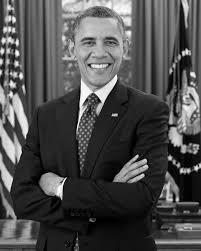

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
# 흰색에 가까우면 가까울 수 록 찾기 더 쉽게 된다.
# 밝은 부분은 더 밝게 어두운 부분은 더 어둡게 한다.

# 히스토그램을 쓰면 강조할 부분을 더 강조한다.

# 히스토그램 균일화



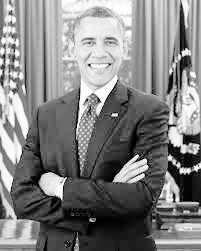

In [ ]:
# 균일화 과

gray = cv2.equalizeHist(gray)
cv2_imshow(gray)

In [ ]:
faces = face_cascade.detectMultiScale(gray) # 검색된 detectMultiScale 얼굴에 대한 정보가 facecascade에 들어있고
# face에는 배열이 들어있다. faces.shape(1개의 얼굴에 대한 4개의 데이터)
faces.shape # 1,4 에서 1은 사람의 얼굴을 나타낸다.

(1, 4)

In [ ]:
faces # [x, y, w, h] w넓이 h 높이
#face의 좌표점 얼굴의 좌표점이 된다

array([[69, 19, 60, 60]], dtype=int32)

In [ ]:
# 얼굴을 찾기위해서 얼굴전체를 찾았지만 얼굴에서 눈을 찾기 위해서는 얼굴의 안쪽에서 만 찾는다.

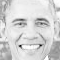

In [ ]:
# 이미지 백업
img_copy = img.copy()

for (x, y, w, h) in faces:
  # center 좌표 구하기
  center = ((x+w) // 2 , (y+h) // 2) # x+w를 하면69 + 60 이므로 .

  img = cv2.rectangle(img_copy, (x,y), (x+w, y+h), (0,255, 0), 3) # x+y start x+w, y+h end

  # cv2_imshow(img)\
  #눈을 찾을 것이다.
  #ROI : Region OF Interest(물체를 찾기 위해 관심있는 영역)
  faceROI = gray[y:y+h, x : x+w] # 얼굴부분만 찾아낸 영역을 그린다.
  cv2_imshow(faceROI)

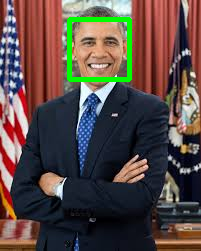

In [ ]:
# 이미지 백업
img_copy = img.copy()

for (x, y, w, h) in faces:
  # center 좌표 구하기
  center = ((x+w) // 2 , (y+h) // 2) # x+w를 하면69 + 60 이므로 .

  img_copy = cv2.rectangle(img_copy, (x,y), (x+w, y+h), (0,255, 0), 3) # x+y start x+w, y+h end

  # cv2_imshow(img)\
  #눈을 찾을 것이다.
  #ROI : Region OF Interest(물체를 찾기 위해 관심있는 영역)
  faceROI = gray[y:y+h, x : x+w] # 얼굴부분만 찾아낸 영역을 그린다.
  # cv2_imshow(faceROI)

  eyes = eye_cascade.detectMultiScale(faceROI)

  for (x2, y2, w2, h2) in eyes: # eye를 찾아내게 된다. # 지금 여기서 찾아낸 x는 x2는 눈의 옆이다.
    eye_center = (x+ x2 + w2 //2, y + y2 + h2 //2)  # 얼굴 시작 위치 눈의 위치 박스의 w를 더해서 나누기 2를 해주면 눈이도니다. 지금
    radius = int(round(w2 + h2) * 0.25)

    img = cv2.circle(img_copy, eye_center, radius(0,255,255), 3)

  cv2_imshow(img)

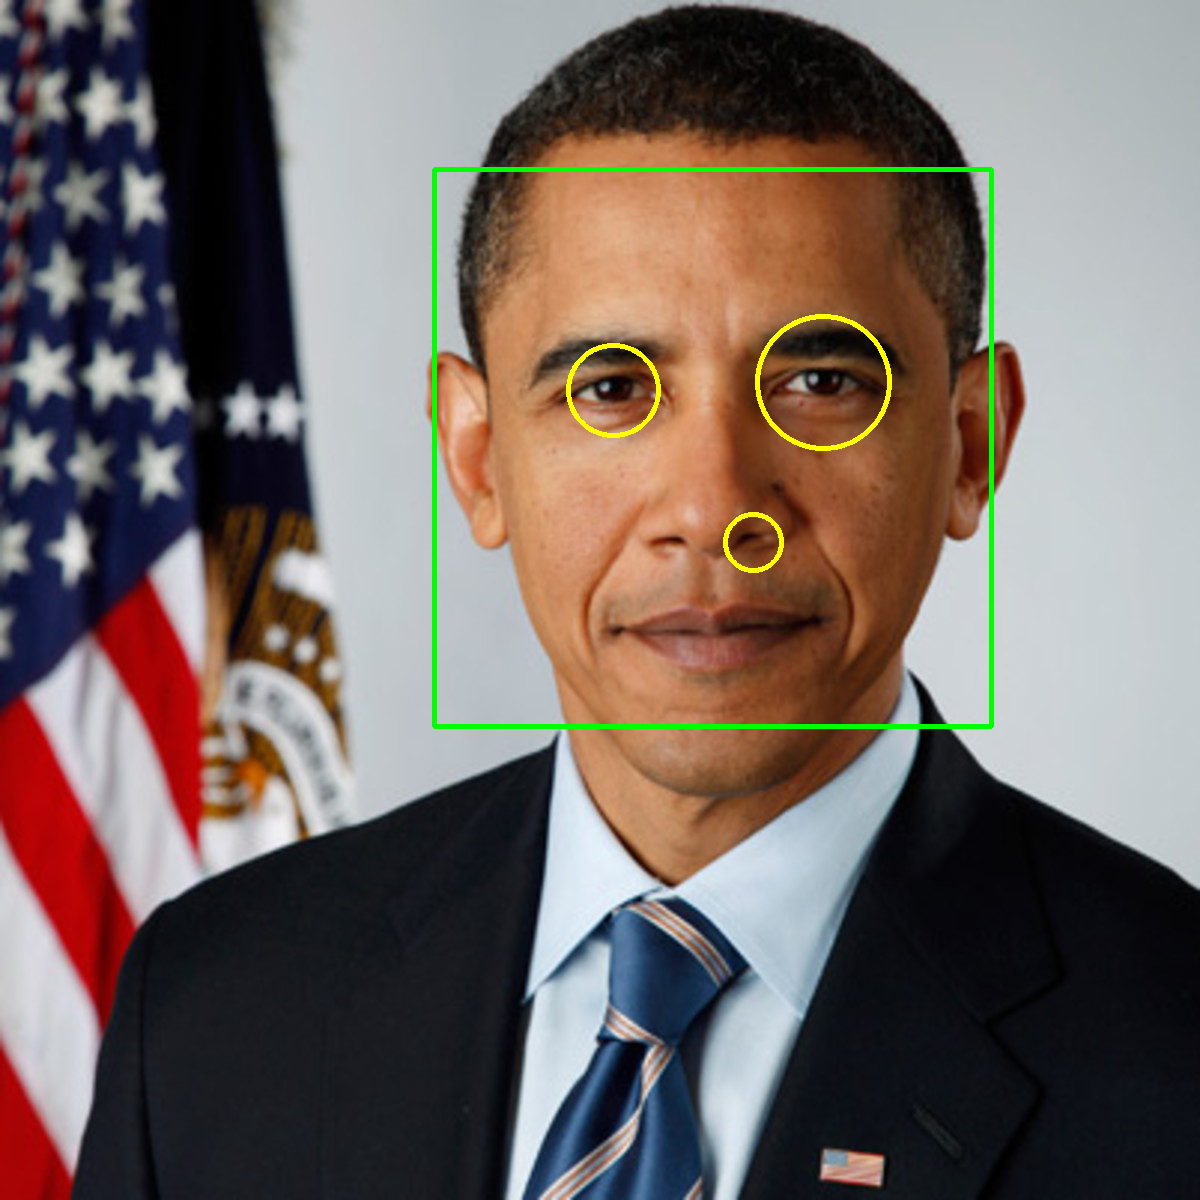

In [ ]:
file_name="obama_03.jpg"
img = cv2.imread(file_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

faces = face_cascade.detectMultiScale(gray)
for (x, y, w, h) in faces:

  # center 좌표 구하기
  # center = ((x + w) // 2, (y + h) // 2)
  img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

  # 눈을 찾을 거에요...
  # ROI : Region Of Interest (물체를 찾기 위해 관심있는 영역)
  faceROI = gray[y: y+h, x:x+w]

  # cv2_imshow(faceROI)
  eyes = eye_cascade.detectMultiScale(faceROI)
  
  for (x2, y2, w2, h2) in eyes:
    eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
    radius = int(round(w2 + h2) * 0.25)
    img = cv2.circle(img, eye_center, radius, (0, 255, 255), 3)
  cv2_imshow(img)

In [ ]:
file_name="obama_02.jpg"  # 02는 옆모습이어서 아예 얼굴을 찾지 못한다.
img = cv2.imread(file_name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

faces = face_cascade.detectMultiScale(gray)
for (x, y, w, h) in faces:

  # center 좌표 구하기
  # center = (x + w // 2, y + h // 2)
  img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

  # 눈을 찾을 거에요...
  # ROI : Region Of Interest (물체를 찾기 위해 관심있는 영역)
  faceROI = gray[y: y+h, x:x+w]

  # cv2_imshow(faceROI)
  eyes = eye_cascade.detectMultiScale(faceROI)
  
  for (x2, y2, w2, h2) in eyes:
    eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
    radius = int(round(w2 + h2) * 0.25)
    img = cv2.circle(img, eye_center, radius, (0, 255, 255), 3)
  cv2_imshow(img)

In [ ]:
file_name = 'obama_01.mp4'

In [ ]:
import IPython
def detectAndDisplay(frame):
  IPython.display.clear_output(wait=True) # 화면이 밑으로 쌓이는 것을 방지
  frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  frame_gray = cv2.equalizeHist(frame_gray)

  # Detect Face
  faces = face_cascade.detectMultiScale(frame_gray)

  for (x, y, w, h) in faces:
    frame= cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3)

    #얼굴 ROi
    faceROI = frame_gray[y:y+h, x:x+w] # 얼굴의 위치 찾아냄

    # 얼굴 부분만 집어넣어서 눈 찾기
    eyes = eye_cascade.detectMultiScale(faceROI)

    for (x2, y2, w2, h2) in eyes:
      eye_center = (x+ x2 + w2 //2, y+ y2 + h2 //2)
      radius = int(round((w2+h2) * 0.25))

      frame = cv2.circle(frame, eye_center, radius, (255, 0, 0), 4)

  cv2_imshow(frame)


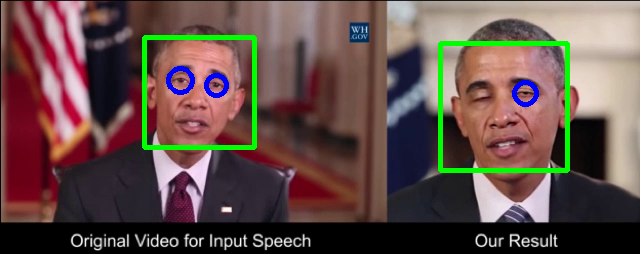

영상 끝!


In [ ]:
# 비디오 캡처
cap = cv2.VideoCapture(file_name)

while True:
  re, frame = cap.read() # 한 프레임씩 영상을 읽어옴
  if frame is None:
    print('영상 끝!')
    break
  
  detectAndDisplay(frame)
